In [1]:
import sys
import os



import numpy as np
from SynthTempNetwork import Individual, SynthTempNetwork
from TemporalNetwork import ContTempNetwork, StaticTempNetwork
from FlowStability import FlowIntegralClustering
import pickle

import matplotlib.pyplot as plt
import matplotlib

from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
from scipy.sparse.linalg import eigsh

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


In [2]:
lamdas=np.logspace(-4,2,20)
print(lamdas)
between_lamdas=np.linspace(-4,2,20)

[1.00000000e-04 2.06913808e-04 4.28133240e-04 8.85866790e-04
 1.83298071e-03 3.79269019e-03 7.84759970e-03 1.62377674e-02
 3.35981829e-02 6.95192796e-02 1.43844989e-01 2.97635144e-01
 6.15848211e-01 1.27427499e+00 2.63665090e+00 5.45559478e+00
 1.12883789e+01 2.33572147e+01 4.83293024e+01 1.00000000e+02]


In [3]:
net = ContTempNetwork.load('fig3_network')

In [4]:
list_forw_flows = []

for i in lamdas:
    list_forw_flows.append(FlowIntegralClustering(T_inter_list=net.inter_T[i],
                                  time_list=net.times,
                                  verbose=True))

PID  12929  : computing T_list
PID  12929  : computing integral
PID  12929  :  0  over  1039  took 0.00s
PID  12929  :  1000  over  1039  took 0.31s
integral took 0.32s
PID  12929  : computing T_list
PID  12929  : computing integral
PID  12929  :  0  over  1039  took 0.00s
PID  12929  :  1000  over  1039  took 0.31s
integral took 0.33s
PID  12929  : computing T_list
PID  12929  : computing integral
PID  12929  :  0  over  1039  took 0.00s
PID  12929  :  1000  over  1039  took 0.31s
integral took 0.32s
PID  12929  : computing T_list
PID  12929  : computing integral
PID  12929  :  0  over  1039  took 0.00s
PID  12929  :  1000  over  1039  took 0.31s
integral took 0.32s
PID  12929  : computing T_list
PID  12929  : computing integral
PID  12929  :  0  over  1039  took 0.00s
PID  12929  :  1000  over  1039  took 0.31s
integral took 0.32s
PID  12929  : computing T_list
PID  12929  : computing integral
PID  12929  :  0  over  1039  took 0.00s
PID  12929  :  1000  over  1039  took 0.31s
integr

In [5]:
for i in range(len(lamdas)):
    list_forw_flows[i].find_louvain_clustering()

In [6]:
static_net_heat = StaticTempNetwork.load('fig3_network_static_heat')

In [7]:
def one_time(s):
    one_time_s = []
    for key in s.keys():
        for i in s[key]:
            one_time_s.append(i)
    return one_time_s

def derivative(v1, v2):
    assert len(v1) == len(v2), "Error: in order to compute the numerical derivative, the two varibales need to have the same lenght."
    derivative = []
    for i, vi in enumerate(v1[1:]):
        m1 =(vi - v1[i-1])/(v2[i]-v2[i-1])
        m2 =(v1[i+1] - vi)/(v2[i+1]-v2[i])
        derivative.append((m1+m2)/2)
    return derivative

# Unweighted Static Network

### Spectral vNS

In [8]:
for i in lamdas:
    static_net_heat.compute_spectral_vonNeumann_entropy(lamda=i, force_csr=True, time_domain = static_net_heat.times[-1:])

Text(0.5, 1.0, 'Spectral vNS')

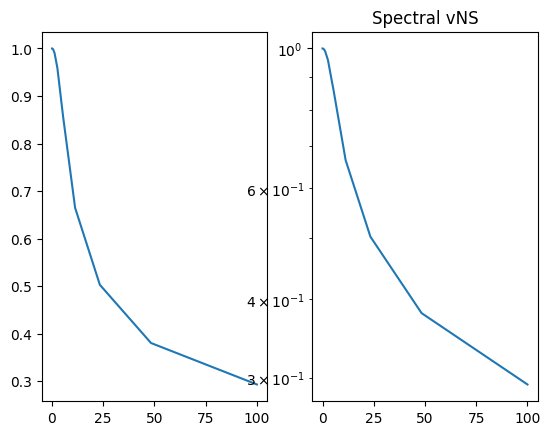

In [9]:
plt.subplot(1, 2, 1)
plt.plot(lamdas, one_time(static_net_heat.spectral_vNS))

plt.subplot(1, 2, 2)
plt.plot(lamdas, one_time(static_net_heat.spectral_vNS))
plt.yscale('log')
plt.title('Spectral vNS')

### Von Neumann Entropy

In [ ]:
for i in lamdas:
    static_net_heat.compute_vonNeumann_entropy(lamda=i, force_csr=True, time_domain = static_net_heat.times[-1:])

/Users/samuelkoovely/Documents/GitHub/flow_stability/flow_stability_env/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'vNS')

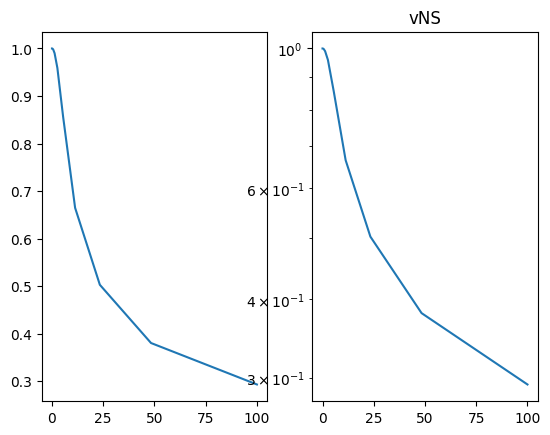

In [11]:
plt.subplot(1, 2, 1)
plt.plot(lamdas, one_time(static_net_heat.vNS))

plt.subplot(1, 2, 2)
plt.plot(lamdas, one_time(static_net_heat.vNS))
plt.yscale('log')
plt.title('vNS')

In [21]:
#comparison between the two

print(one_time(static_net_heat.vNS))
print(one_time(static_net_heat.spectral_vNS))

[0.9999999999393974, 0.9999999997405373, 0.9999999988891483, 0.999999995244023, 0.99999997963764, 0.9999999128180653, 0.9999996267106963, 0.9999984015211193, 0.9999931537304445, 0.9999706660410477, 0.9998742219894653, 0.9994600537561257, 0.9976797975543772, 0.990072277281908, 0.9589948957608949, 0.8557681319915619, 0.6646141844131049, 0.5026374660063939, (0.38007352162408076+2.1092402438327555e-18j), (0.2928019398417842+1.1245397690441081e-17j)]
[0.9999999999393968, 0.9999999997405373, 0.999999998889148, 0.9999999952440229, 0.9999999796376396, 0.9999999128180651, 0.9999996267106958, 0.9999984015211187, 0.9999931537304438, 0.999970666041047, 0.9998742219894651, 0.9994600537561253, 0.9976797975543764, 0.9900722772819074, 0.9589948957608951, 0.8557681319915615, 0.6646141844131046, 0.5026374660063939, 0.3800735216240808, 0.29280193984178904]


## Derivatives

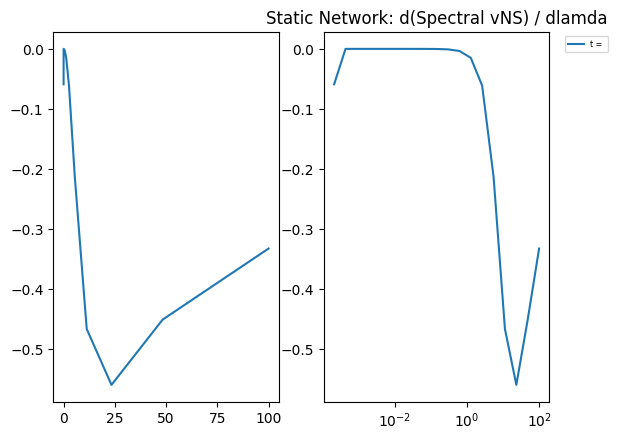

In [14]:
St = []
for j, lamda in enumerate(lamdas):
    St = one_time(static_net_heat.vNS)

v1 = St
v2 = between_lamdas
ds_dt = derivative(v1, v2)

plt.subplot(1, 2, 1)
plt.plot(lamdas[1:], ds_dt, label='t = ')

plt.subplot(1, 2, 2)
plt.plot(lamdas[1:], ds_dt, label='t = ')
plt.xscale('log')

plt.legend(fontsize='xx-small', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Static Network: d(Spectral vNS) / dlamda')
#plt.savefig('./figures/fig3_recap_entropy_plots/fig3_dspectral_vNS_dlamda.eps', format='eps')

plt.show()

# Weighted Static network

In [15]:
static_net_weighted_heat = StaticTempNetwork.load('fig3_network_static_weighted_heat')

In [16]:
for i in lamdas:
    static_net_weighted_heat.compute_spectral_vonNeumann_entropy(lamda=i, force_csr=True, time_domain = static_net_heat.times[-1:])

In [ ]:
for i in lamdas:
    static_net_weighted_heat.compute_vonNeumann_entropy(lamda=i, force_csr=True, time_domain = static_net_heat.times[-1:])

In [22]:
#comparison between the two

print(one_time(static_net_weighted_heat.vNS))
print(one_time(static_net_weighted_heat.spectral_vNS))

[0.999999955289536, 0.9999998085812399, 0.9999991804874483, 0.9999964915365851, 0.9999849805676537, 0.9999357135835996, 0.9997249866026624, 0.9988257913858184, 0.9950248098339654, 0.9795689525037738, 0.9256311512903428, 0.8076616888559246, 0.6857067475691291, 0.5918615255192847, (0.5075146734711109+8.228038327952037e-19j), (0.3935921613163036+4.434467857971548e-17j), (0.28656734260116695+3.210234340792328e-17j), (0.2527364438894735+3.5212165176526783e-17j), (0.25001668852785136+6.820401686995877e-17j), (0.2500000002848451+7.087639630528276e-17j)]
[0.9999999552895352, 0.9999998085812395, 0.9999991804874482, 0.9999964915365845, 0.9999849805676533, 0.9999357135835988, 0.9997249866026622, 0.9988257913858184, 0.9950248098339649, 0.9795689525037735, 0.925631151290343, 0.8076616888559247, 0.685706747569129, 0.5918615255192845, 0.507514673471108, 0.39359216131630886, 0.2865673426011726, 0.2527364438894813, 0.2500166885278583, 0.25000000028485303]


/Users/samuelkoovely/Documents/GitHub/flow_stability/flow_stability_env/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'vNS')

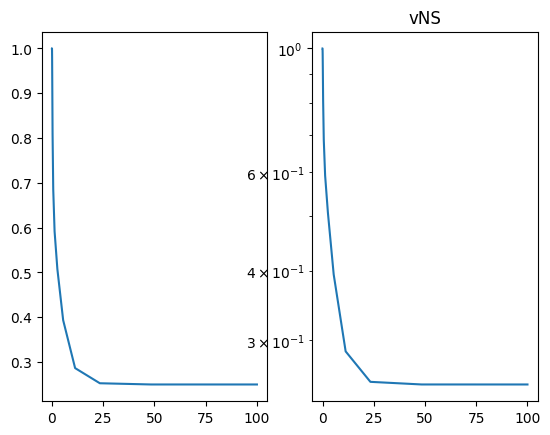

In [24]:
plt.subplot(1, 2, 1)
plt.plot(lamdas, one_time(static_net_weighted_heat.vNS))

plt.subplot(1, 2, 2)
plt.plot(lamdas, one_time(static_net_weighted_heat.vNS))
plt.yscale('log')
plt.title('vNS')

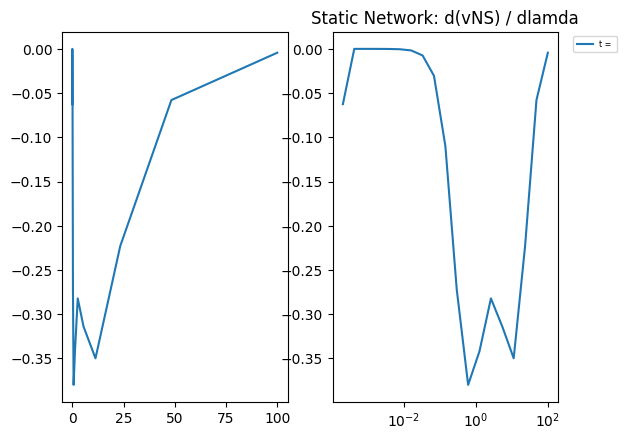

In [25]:
for j, lamda in enumerate(lamdas):
    St = one_time(static_net_weighted_heat.vNS)

    v1 = St
    v2 = between_lamdas
    ds_dt = derivative(v1, v2)

plt.subplot(1, 2, 1)
plt.plot(lamdas[1:], ds_dt, label='t = ')

plt.subplot(1, 2, 2)
plt.plot(lamdas[1:], ds_dt, label='t = ')
plt.xscale('log')

plt.legend(fontsize='xx-small', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Static Network: d(vNS) / dlamda')
#plt.savefig('./figures/fig3_recap_entropy_plots/fig3_dvNS_dlamda.eps', format='eps')

plt.show()